In [61]:
import networkx as nx
import matplotlib.pyplot as plt

In [62]:
district_neighbors = {
    'Bagerhat': ['Khulna', 'Gopalganj', 'Narail','Pirojpur', 'Barguna'],
    'Bandarban': ['Rangamati', 'Khagrachari', 'Chittagong','Coxs_Bazar'],
    'Barguna': ['Patuakhali', 'Jhalokathi','Barisal', 'Bagerhat', 'Pirojpur'],
    'Barisal': ['Shariatpur','Bhola', 'Patuakhali', 'Jhalokathi','Madaripur', 'Gopalganj', 'Barguna','Lakshmipur'],
    'Bhola': ['Barisal', 'Patuakhali', 'Lakshmipur', 'Noakhali'],
    'Bogra': ['Joypurhat', 'Gaibandha', 'Sirajganj', 'Natore', 'Naogaon'],
    'Brahmanbaria': ['Joypurhat', 'Gaibandha', 'Natore', 'Sirajganj','Jamalpur','Naogaon'],
    'Chandpur': ['Munshiganj', 'Comilla', 'Noakhali','Lakshmipur','Barisal','Comilla','Shariatpur','Munshiganj'],
    'Chapai_Nawabganj': ['Rajshahi', 'Naogaon'],
    'Chittagong': ['Coxs_Bazar', 'Bandarban', 'Rangamati', 'Khagrachari', 'Feni', 'Noakhali'],
    'Chuadanga': ['Meherpur', 'Kushtia', 'Jhenaidah','Jessore'],
    'Comilla': ['Brahmanbaria', 'Chandpur', 'Feni', 'Munshiganj', 'Noakhali'],
    'Coxs_Bazar': ['Bandarban'],
    'Dhaka': ['Gazipur', 'Tangail', 'Munshiganj', 'Rajbari', 'Manikganj', 'Narayanganj'],
    'Dinajpur': ['Thakurgaon', 'Panchagarh', 'Joypurhat', 'Rangpur', 'Gaibandha', 'Nilphamari'],
    'Faridpur': ['Madaripur', 'Manikganj', 'Magura', 'Narail', 'Gopalganj', 'Rajbari','Munshiganj','Dhaka'],
    'Feni': ['Chittagong', 'Comilla', 'Noakhali'],
    'Gaibandha': ['Rangpur', 'Kurigram',  'Joypurhat','Dinajpur','Bogra','Jamalpur'],
    'Gazipur': ['Kishoreganj','Tangail', 'Mymensingh', 'Narsingdi', 'Narayanganj', 'Dhaka'],
    'Gopalganj': ['Faridpur', 'Barisal', 'Narail', 'Madaripur','Pirojpur','Bagerhat','Khulna'],
    'Habiganj': ['Moulvibazar', 'Sunamganj', 'Kishoreganj', 'Brahmanbaria', 'Sylhet'],
    'Jamalpur': ['Tangail', 'Mymensingh', 'Sherpur'],
    'Jessore': ['Narail', 'Magura', 'Khulna', 'Satkhira', 'Jhenaidah'],
    'Jhalokathi': ['Barisal', 'Barguna','Pirojpur'],
    'Jhenaidah': ['Jessore', 'Magura', 'Kushtia', 'Chuadanga','Rajbari'],
    'Joypurhat': ['Bogra', 'Naogaon', 'Dinajpur', 'Gaibandha'],
    'Khagrachari': ['Rangamati', 'Chittagong'],
    'Khulna': ['Satkhira', 'Jessore', 'Narail', 'Bagerhat','Gopalganj'],
    'Kishoreganj': ['Netrokona', 'Mymensingh', 'Brahmanbaria', 'Habiganj','Narsingdi','Sunamganj','Gazipur'],
    'Kurigram': ['Jamalpur', 'Lalmonirhat', 'Rangpur', 'Gaibandha'],
    'Kushtia': ['Rajshahi', 'Rajbari', 'Meherpur', 'Chuadanga', 'Jhenaidah','Natore','Pabna'],
    'Lakshmipur': ['Bhola', 'Noakhali', 'Barisal', 'Chandpur'],
    'Lalmonirhat': ['Kurigram', 'Rangpur', 'Nilphamari'],
    'Madaripur': ['Faridpur', 'Gopalganj', 'Barisal', 'Shariatpur','Munshiganj'],
    'Magura': ['Jessore', 'Narail', 'Rajbari', 'Jhenaidah', 'Faridpur'],
    'Manikganj': ['Pabna', 'Tangail', 'Faridpur'],
    'Meherpur': ['Chuadanga', 'Kushtia'],
    'Moulvibazar': ['Habiganj', 'Sylhet'],
    'Munshiganj': ['Dhaka', 'Narayanganj', 'Madaripur', 'Shariatpur', 'Chandpur', 'Comilla', 'Dhaka','Faridpur'],
    'Mymensingh': ['Gazipur', 'Netrokona', 'Kishoreganj', 'Jamalpur','Sherpur', 'Tangail'],
    'Naogaon': ['Rajshahi', 'Joypurhat', 'Bogra','Natore', 'Chapai_Nawabganj'],
    'Narail': ['Jessore', 'Magura', 'Khulna','Faridpur'],
    'Narayanganj': ['Gazipur', 'Narsingdi', 'Munshiganj', 'Dhaka'],
    'Narsingdi': ['Gazipur', 'Brahmanbaria', 'Narayanganj', 'Munshiganj'],
    'Natore': ['Pabna', 'Sirajganj', 'Rajshahi','Kushtia','Bogra'],
    'Netrokona': ['Mymensingh', 'Kishoreganj', 'Sunamganj'],
    'Nilphamari': ['Rangpur', 'Lalmonirhat', 'Thakurgaon', 'Dinajpur'],
    'Noakhali': ['Feni', 'Comilla', 'Lakshmipur', 'Chandpur'],
    'Pabna': ['Sirajganj', 'Bogra', 'Rajbari', 'Natore'],
    'Panchagarh': ['Thakurgaon', 'Dinajpur', 'Nilphamari'],
    'Patuakhali': ['Bhola','Barisal', 'Barguna'],
    'Pirojpur': ['Barguna','Jhalokathi', 'Bagerhat', 'Barisal'],
    'Rajbari': ['Faridpur', 'Narail', 'Jhenaidah','Kushtia', 'Pabna','Manikganj'],
    'Rajshahi': ['Naogaon', 'Natore', 'Chapai_Nawabganj', 'Kushtia'],
    'Rangamati': ['Khagrachari', 'Bandarban', 'Chittagong'],
    'Rangpur': ['Kurigram', 'Lalmonirhat', 'Nilphamari', 'Dinajpur', 'Gaibandha'],
    'Satkhira': ['Jessore', 'Khulna'],
    'Shariatpur': ['Barisal', 'Chandpur', 'Bhola', 'Madaripur'],
    'Sherpur': [ 'Mymensingh', 'Jamalpur'],
    'Sirajganj': ['Bogra', 'Pabna', 'Natore', 'Jamalpur','Tangail'],
    'Sunamganj': ['Habiganj', 'Sylhet', 'Netrokona','Kishoreganj'],
    'Sylhet': ['Habiganj', 'Moulvibazar', 'Sunamganj'],
    'Tangail': ['Gazipur', 'Manikganj', 'Dhaka', 'Mymensingh', 'Jamalpur'],
    'Thakurgaon': ['Panchagarh', 'Dinajpur']
}

In [63]:
len(district_neighbors)

64

In [64]:
# find out the number of unique district neighours in the dataset

unique_districts = set()
for district, neighbors in district_neighbors.items():
    unique_districts.add(district)
    for neighbor in neighbors:
        unique_districts.add(neighbor)
len(unique_districts)

64

In [65]:
# number of unique district neighbors in the dataset that are not in the list of districts

unique_districts - set(district_neighbors.keys())

set()

In [66]:
unique_districts

{'Bagerhat',
 'Bandarban',
 'Barguna',
 'Barisal',
 'Bhola',
 'Bogra',
 'Brahmanbaria',
 'Chandpur',
 'Chapai_Nawabganj',
 'Chittagong',
 'Chuadanga',
 'Comilla',
 'Coxs_Bazar',
 'Dhaka',
 'Dinajpur',
 'Faridpur',
 'Feni',
 'Gaibandha',
 'Gazipur',
 'Gopalganj',
 'Habiganj',
 'Jamalpur',
 'Jessore',
 'Jhalokathi',
 'Jhenaidah',
 'Joypurhat',
 'Khagrachari',
 'Khulna',
 'Kishoreganj',
 'Kurigram',
 'Kushtia',
 'Lakshmipur',
 'Lalmonirhat',
 'Madaripur',
 'Magura',
 'Manikganj',
 'Meherpur',
 'Moulvibazar',
 'Munshiganj',
 'Mymensingh',
 'Naogaon',
 'Narail',
 'Narayanganj',
 'Narsingdi',
 'Natore',
 'Netrokona',
 'Nilphamari',
 'Noakhali',
 'Pabna',
 'Panchagarh',
 'Patuakhali',
 'Pirojpur',
 'Rajbari',
 'Rajshahi',
 'Rangamati',
 'Rangpur',
 'Satkhira',
 'Shariatpur',
 'Sherpur',
 'Sirajganj',
 'Sunamganj',
 'Sylhet',
 'Tangail',
 'Thakurgaon'}

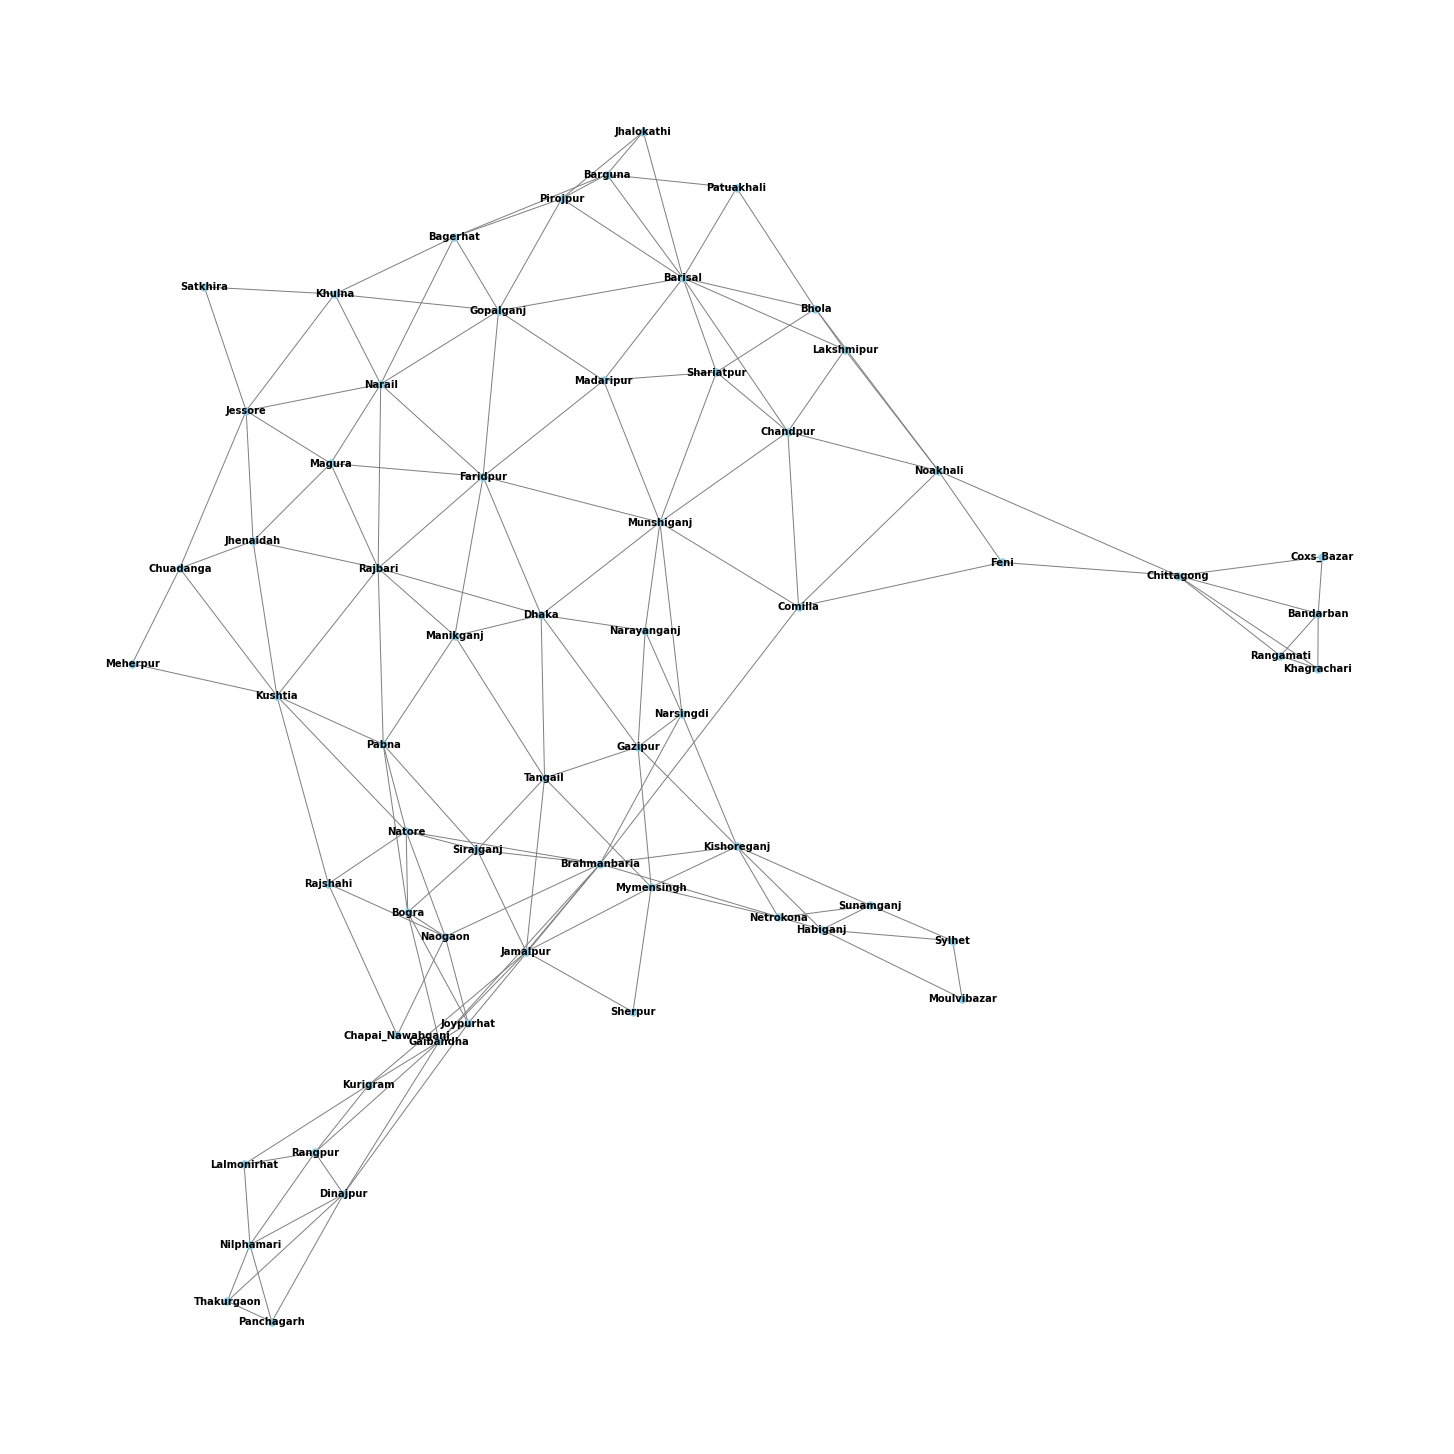

In [70]:
G = nx.Graph()
G.add_nodes_from(district_neighbors.keys())

for district, neighbors in district_neighbors.items():
    for neighbor in neighbors:
        G.add_edge(district, neighbor)

pos = nx.spring_layout(G)
plt.figure(figsize=(20, 20))
nx.draw(G, pos, with_labels=True, font_size=10, node_size=60, node_color='skyblue', font_color='black', font_weight='bold', edge_color='gray', linewidths=0.5)

plt.show()

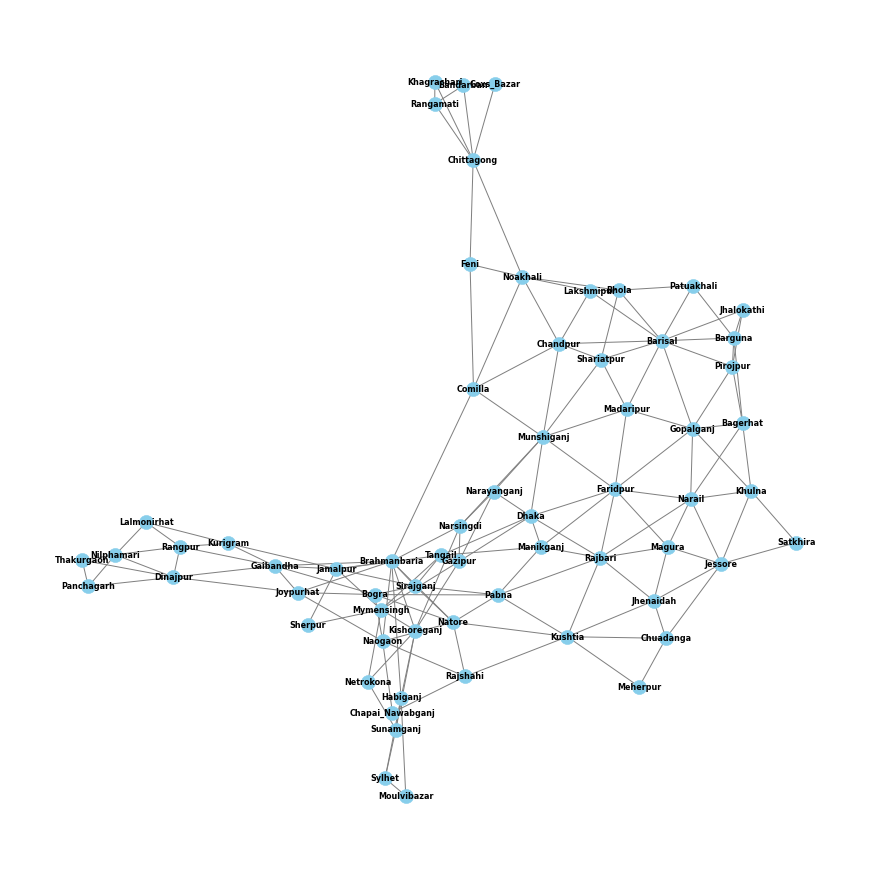

In [71]:
import networkx as nx

import matplotlib.pyplot as plt

# Create a new graph
G = nx.Graph()

# Add nodes from the unique_districts set
G.add_nodes_from(unique_districts)

# Add edges from the district_neighbors dictionary
for district, neighbors in district_neighbors.items():
    for neighbor in neighbors:
        G.add_edge(district, neighbor)

# Set the positions of the nodes using the pos dictionary
pos = nx.spring_layout(G, seed=42)

# Set the figure size
plt.figure(figsize=(12, 12))

# Draw the graph with labels
nx.draw(G, pos, with_labels=True, font_size=8, node_size=200, node_color='skyblue', font_color='black', font_weight='bold', edge_color='gray', linewidths=0.5)

# Show the plot
plt.show()

In [68]:
coordinates = [
    (23.726258529330963, 90.39760215443611),  # Dhaka Medical College Hospital - G01
    (23.7113636721593, 90.40128288327219),    # SSMCH - G02
    (23.721888178220713, 90.39266678134557),  # Shishu Hospital - G03
    (23.769551979091727, 90.37133208141863),  # SWMH - G04
    (23.739028157774353, 90.39548058141801),  # BSMMU - G05
    (23.73701446380184, 90.41667109720919),   # Police Hospital - G06
    (23.732505152869958, 90.43005601025426),  # Mugda Medical - G07
    (23.727245339635754, 90.37814792559973),  # BGB Hospital - G08
    (23.814783685079878, 90.39889705443794),  # Samorik Hospital - G09
    (23.819453868399307, 90.40935001025609),  # Kurmitola - G10
    (23.87080752284285, 90.40354398142077),   # Kuwait BD - G11
    (23.717493737377456, 90.37719205781974),  # Kamrangir chor - G12
    (23.77433962044181, 90.36838890516535),   # TB Hospital Shyamoli - G13
    (23.776896719367194, 90.40577550722847),  # Songkramok Byadhi - G14
    (23.773760673697247, 90.37031486792793),  # NITOR - G15
    (23.914206815785917, 90.26912412511575),  # Samorik Hospital(Savar) - G16
    (23.728920323677116, 90.40497918921318),  # Sorkari Kormochari - G17
    (23.714229014360615, 90.40500592374467),  # Dhaka Mohanogor General - G18
    (23.719020414582218, 90.39259933127892),  # DSCC Shishu - G19
    (23.77444364645435, 90.4008203525824),     # DNCC Dedicated Covid - G20
    (23.75061422282243, 90.36979913909104),   # Bangladesh MCH - N01
    (23.74689828803771, 90.40314991210928),   # Holy Family Red Crescent - N02
    (23.73960111901086, 90.39632632258575),   # Birdem - N03
    (23.746377694828784, 90.37219606989669),  # Ibn Sina - N04
    (23.753010718774295, 90.3815061525819),   # Square - N05
    (23.749479686986273, 90.38618615258184),  # Comfort Nursing - N06
    (23.752791839084207, 90.38516703909104),  # Shomorita - N07
    (23.788680663544458, 90.35355048141906),  # Delta Medical College - N08
    (23.742417761326248, 90.38302618327282),  # Labaid - N09
    (23.743634617303403, 90.38422172745472),  # Central Hospital - N10
    (23.791677153192687, 90.42501555740265),  # High Care Hospital - N11
    (23.75186326095531, 90.38555483909101),   # Help & Hope - N12
    (23.746713049788433, 90.3858482121093),   # Green Life - N13
    (23.737880855556384, 90.40968359676359),  # Islami Bank Central - N14
    (23.804910313097285, 90.4157728544377),   # United - N15
    (23.749139762830996, 90.42018828141823),  # Khidma - N16
    (23.879007277702033, 90.39287425443928),  # Shahid Monsur Ali - N17
    (23.747478666730757, 90.41037836792734),  # Sirajul Islam - N18
    (23.81052198596412, 90.43135408327426),   # Evercare - N19
    (23.748542644855437, 90.40553422560019),  # Ad-din Medical - N20
    (23.77643377119459, 90.39564021025521),   # Universla Medical - N21
    (23.752496879864417, 90.38559181210941),  # BRB - N22
    (23.707964710615958, 90.42365933909015),  # Ajgor Ali - N23
    (23.77674549765072, 90.36297432560076),   # BD Specialized - N24
    (23.87487552686038, 90.39664535258447),   # Uttara adhunik - N25
    (23.71713013292547, 90.42005909676308),   # Salauddin - N26
    (23.73932596260316, 90.38228915443636),   # Popular medical - N27
    (23.867565305539124, 90.39739452560266),  # Uttara crescent - N28
    (23.745374110927905, 90.3822240256001),   # Anowar khan - N29
    (23.858537751690243, 90.4009591967661),   # Medical college for women - N30
    (23.808288145246028, 90.36113035464749),  # Dr. M R khan - N31
    (23.77401294737494, 90.3614897781836),    # Dhaka central - N32
    (23.881868548272667, 90.40420552560295),  # Aichi hospital - N33
    (23.743368548190734, 90.40773758327285),  # Monowara hospital private - N34
    (23.791591769240803, 90.42020373909189),  # Jainul Haq shikdar - N35
    (23.83842325478293, 90.25290921025649),   # Enam medical - N36
    (23.7845424722981, 90.42595392374616),    # AMZ - N37
    (23.730582390942406, 90.35817111210898),  # Life and care - N38
    (23.754359956865457, 90.37477546792752),  # Farabi general hospital - N39
    (23.73981521973286, 90.3751340679272),    # Japan BD friendship - N40
    (23.798503360359252, 90.37219025443761),  # Exim Bank Hospital - N41
    (23.756062493992758, 90.3632184544367),   # AL Manar - N42
    (23.768703817463756, 90.36873315258221),  # Dhaka Healthcare - N43
    (23.773694847585368, 90.39884821025517),  # Metro politon Medical centre - N44
    (23.703179382639853, 90.38871456792647),  # Sajeda hospital - N45
    (23.674755148548773, 90.43511936978058),  # Bashundhara ad-din - N46
    (23.782345481118913, 90.35258169490973),  # BIHS General - N47
    (23.750002980978078, 90.40928799676384),  # Dhaka community - N48
    (23.74440953311991, 90.37209985443648),   # Northern Intl - N49
    (23.69496946630764, 90.43284613908983),   # Ad-din Barister - N50
    (23.809882502946316, 90.36768588327422),  # Alok hospital - N51
    (23.754193914452284, 90.36543585244601),  # City hospital - N52
    (23.749307846409437, 90.38608801642633),  # Crescent Gastro Liver - N53
    (23.819693093024494, 90.36543081211082),  # Islami Bank - N54
    (23.822525244233656, 90.36532383723781),  # Marks Medical College - N55
    (23.702592931014344, 90.41755619676282),  # Millenium Specialized - N56
    (23.77723674232899, 90.39864510654571),   # ICCDRB - N57
    (23.750459302871562, 90.40239242374547)   # Insaf Barakah - N58
]

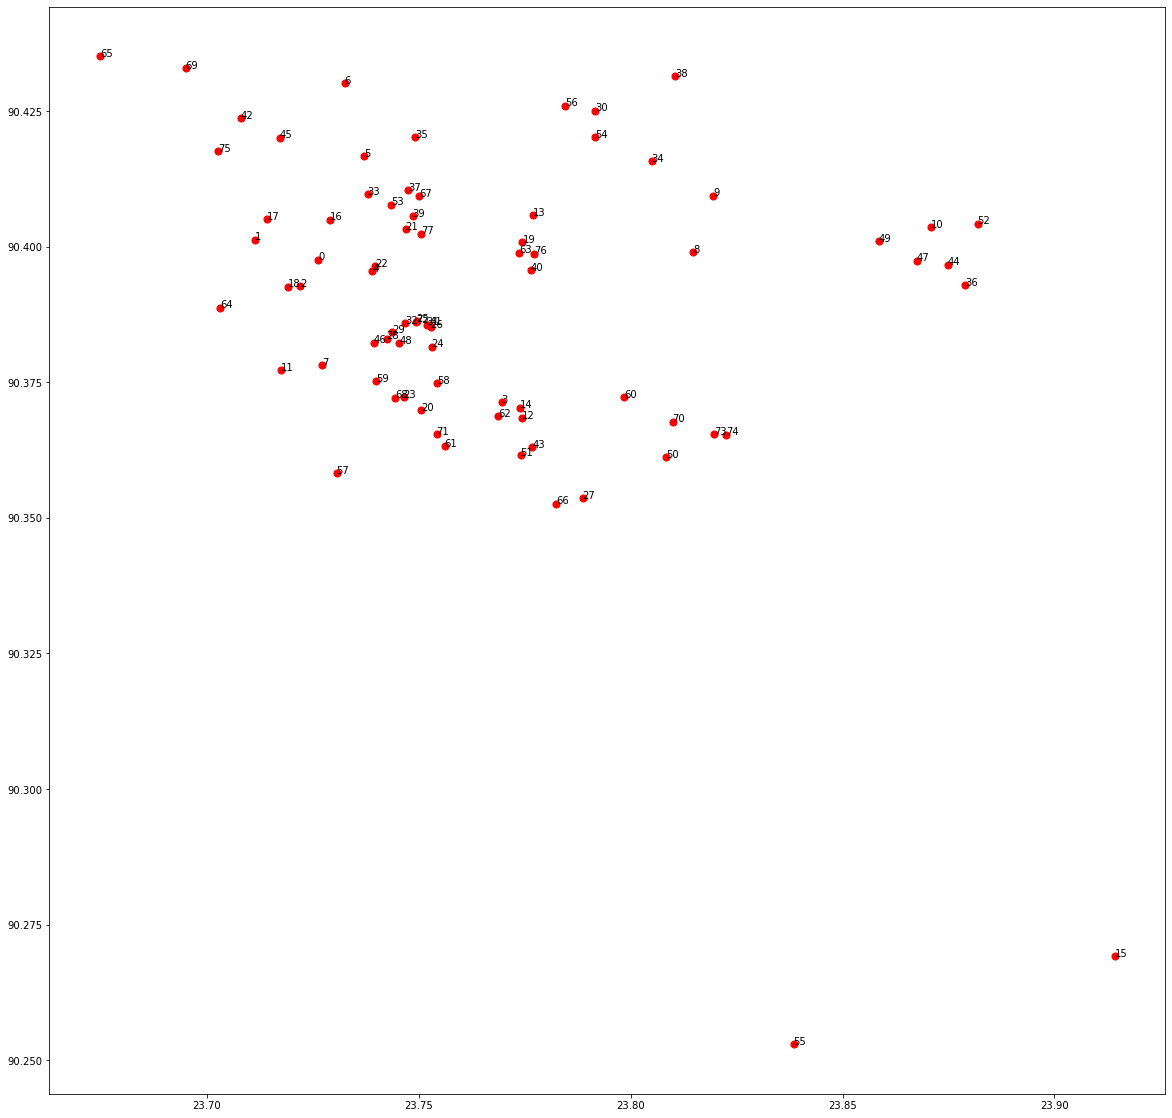

In [69]:
x = []
y = []
for coordinate in coordinates:
    x.append(coordinate[0])
    y.append(coordinate[1])

plt.figure(figsize=(20,20))
plt.scatter(x, y, s=50, c='red')
for i, txt in enumerate(range(len(coordinates))):
    plt.annotate(txt, (x[i], y[i]), fontsize=10)
# plt.scatter(x, y)
plt.show()